In [1]:
# Please use python 3.7
import os
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pycatch22
from statsmodels.distributions.empirical_distribution import ECDF
from generate_motif import generate_prompt

Subject 1
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
1
2
3
4
Notes:  [56, 45, 71, 62, 37]
Velocities:  [96, 94, 94, 91, 95]
Durations:  ([1, 1, 1, 0.5, 2], [0, 0, 0, 0, 0])
Cumulative time:  [480, 960, 1440, 1680, 2640]
Subject 2
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
1
2
3
4
Notes:  [0, 0, 13, 0, 0]
Velocities:  [81, 88, 92, 92, 96]
Durations:  ([0.5, 2, 1, 1, 1], [0, 0, 0, 0, 0])
Cumulative time:  [240, 1200, 1680, 2160, 2640]
Subject 3
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/dat

### First we load the EEG data:

In [2]:
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from scipy.ndimage import uniform_filter1d, sobel, prewitt, fourier_gaussian, fourier_shift
N = 100
runs = 1  # use only eye open data (left vs right)
# Get data and locate in to given path
allfiles = [eegbci.load_data(subject, runs, '../datasets/') for subject in range(N+1)[1:]]
# Read raw data files where each file contains a run
allraws = [[read_raw_edf(f, preload=True) for f in files] for files in allfiles]
# Combine all loaded runs
X_ = [np.array(concatenate_raws(raws).get_data()) for raws in allraws]

Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /home/brendan/OneDrive/Masters/BrainHack2022/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R01.edf...
EDF file detected


### Calculate ranges of dimensionalities and autocorrelation timescales:

In [3]:
def extractglobal(X):
    pca = PCA()
    pca.fit(X)
    x = pca.components_[0]
    v = pca.explained_variance_ratio_[0]
    return x, v

### Then we extract a global signal for a single subject:

In [4]:
xs, pc = zip(*[extractglobal(X) for X in X_])

In [5]:
rc = [pycatch22.CO_f1ecac(list(x)) for x in xs]

Text(0.5, 1.0, 'Explained variances over subjects')

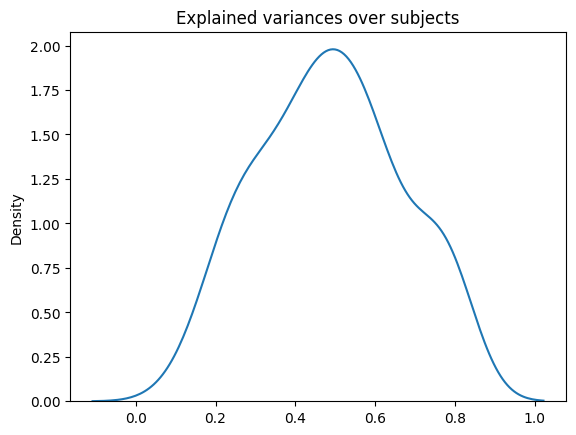

In [6]:
sns.kdeplot(pc)
plt.title('Explained variances over subjects')
# pca = PCA()
# pca.fit(X_[np.argmin(vs)])
# vs_ = pca.explained_variance_ratio_
# sns.lineplot(range(len(vs_)), vs_)

Text(0.5, 1.0, 'Timescales across subjects')

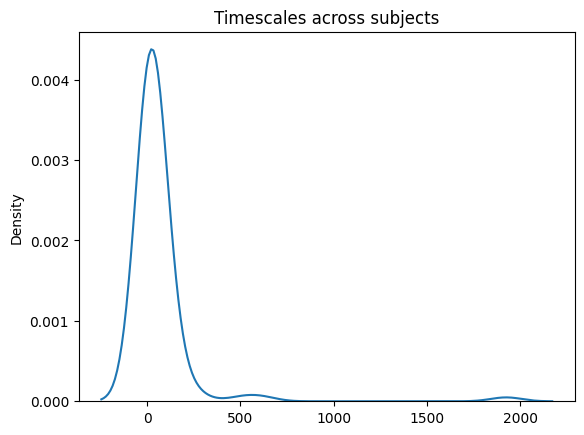

In [7]:
sns.kdeplot(rc)
plt.title('Timescales across subjects')

/home/brendan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PC = 0.56')

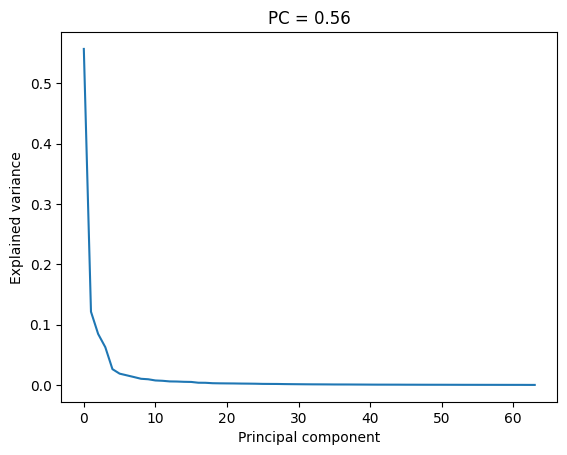

In [8]:
X = X_[0]
pca = PCA()
pca.fit(X)
v = pca.explained_variance_ratio_
x = pca.components_[0]
sns.lineplot(range(len(v)), v)
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('PC = {:.2f}'.format(v[0]))

/home/brendan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

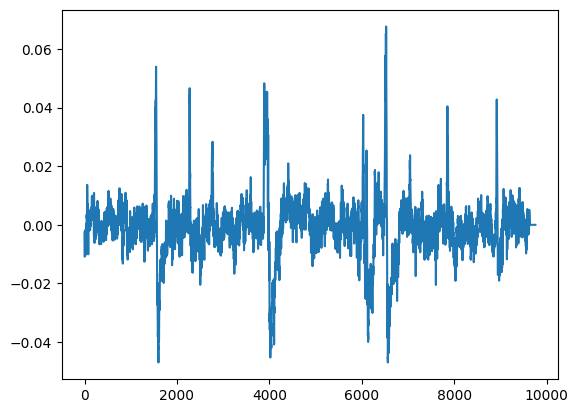

In [9]:
sns.lineplot(range(len(pca.components_[0])), pca.components_[0])

In [10]:
# Convert metrics to scores for a single subject using the cdf
pc = 1 - ECDF(pc)(v[0]) # One minus so that higher explained variance (lower dim.) means lower polyphonicity
rc = 1 - ECDF(rc)(pycatch22.CO_f1ecac(list(x))) # Longer timescales equal lower rhythmicity

### Generate a prompt from the global signal:

In [13]:
file_path = generate_prompt(x)

1
2
3
4
5
6
7
8
9
Notes:  [45, 60, 35, 37, 64, 50, 68, 38, 48, 47]
Velocities:  [106, 100, 100, 103, 111, 103, 93, 104, 100, 104]
Durations:  ([2, 1, 1, 1, 0.5, 2, 0.5, 2, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Cumulative time:  [240, 360, 480, 600, 660, 900, 960, 1200, 1320, 1440]


'/tmp/tmpmidi.mid'

In [12]:
import models
from MuseMorphose import generate
file_path = generate(pc, rc)

ModuleNotFoundError: No module named 'wget'

# Extract the three dominant components of the EEG data for a single subjects as a list of vectors

# Pass midi theme and three selected EEG signals to composer (Aria's transposition + embellishment code)